# Altair area chart examples

By [Ben Welsh](http://palewi.re/who-is-ben-welsh/)

How to use the [Altair](http://altair-viz.github.io) data visualization library to create an array of area charts.

### Preparation

We start by importing Altair.

In [3]:
import altair as alt

Next we bring in our example dataset, which tracks the mix of electricity sources used to generate power in the state of Iowa.

It's provided by the U.S. Energy Information Administration via the Vega project's example datasets library.

In [6]:
import vega_datasets

In [8]:
data = vega_datasets.data.iowa_electricity()

It shows that the share of Iowa's electricity generated via renewable sources like wind power has skyrocketed in recent years.

There are three electricity sources: fossil fuels, nuclear energy and renewables. Each source's net generation numbers are reported in thousand megawatthours by year. The dates are encoded in ISO format.

In [9]:
data.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


That last part is important. Altair generally expects 

### Stacked area chart

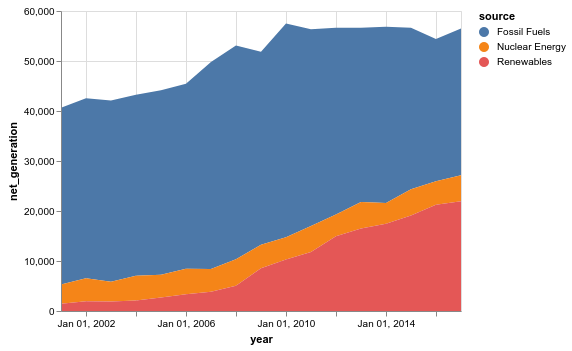

In [3]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

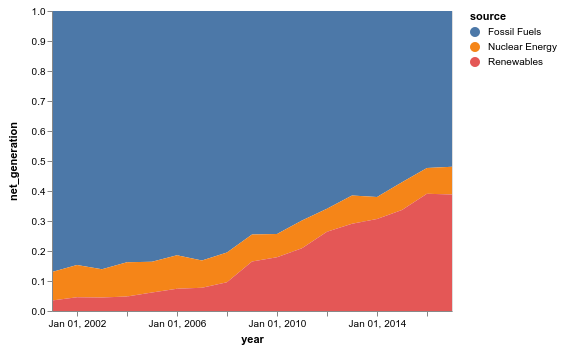

In [4]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack="normalize"),
    color="source:N"
)

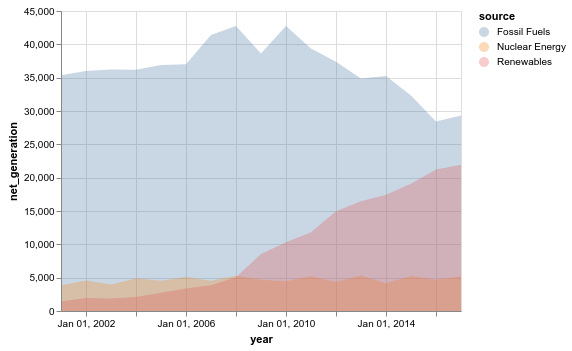

In [6]:
alt.Chart(data).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)

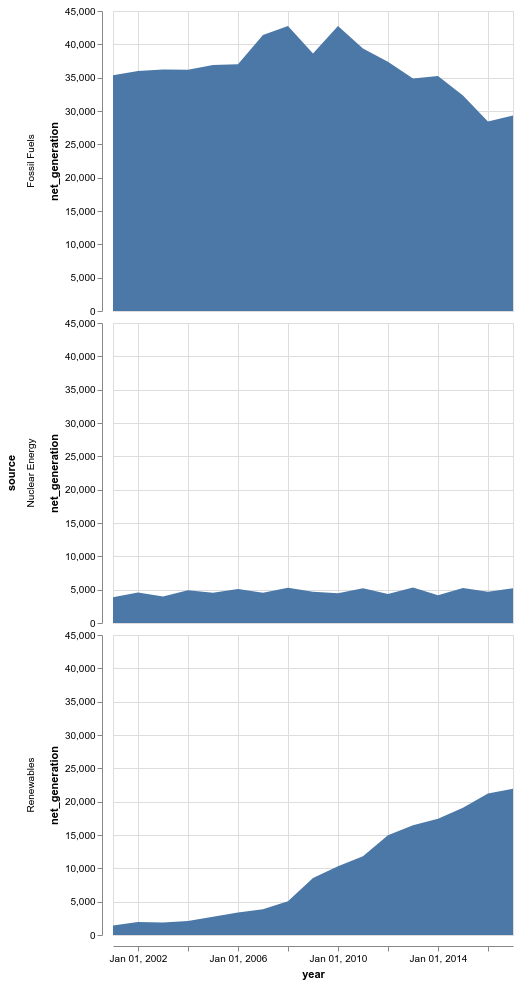

In [7]:
alt.Chart(data).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    row="source:N"
)

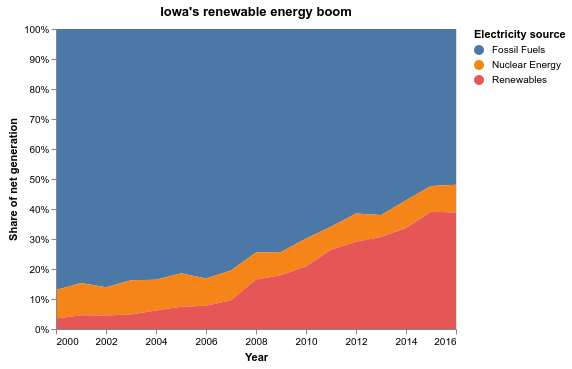

In [44]:
alt.Chart(data, title="Iowa's renewable energy boom").mark_area().encode(
    x=alt.X(
        "year:T",
        timeUnit="year",
        axis=alt.Axis(title="Year")
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        axis=alt.Axis(title="Share of net generation", format=".0%"),
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),
    )
)